In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

application_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/neuro_challenge/Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
fin_df = application_df.drop(['EIN'], axis=1)
fin_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [5]:
fin_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

# Bucketing
## Bucketing Name column

In [6]:
name_check = fin_df.NAME.value_counts()
len(name_check[name_check > 5]) # Number of names with values > 5

354

In [7]:
len(name_check[name_check <= 5]) # Number of names with values < 5

19214

In [8]:
name_to_replace = list(name_check[name_check <= 5].index)

for name in name_to_replace:
  fin_df.NAME = fin_df.NAME.replace(name, "Other")

fin_df.NAME.value_counts()

Other                                                    20043
PARENT BOOSTER USA INC                                    1260
TOPS CLUB INC                                              765
UNITED STATES BOWLING CONGRESS INC                         700
WASHINGTON STATE UNIVERSITY                                492
                                                         ...  
KIWANIS INTERNATIONAL                                        6
OFFICE AND PROFESSIONAL EMPLOYEES INTERNATIONAL UNION        6
HUGH OBRIAN YOUTH LEADERSHIP                                 6
NATIONAL CHARITY LEAGUE INC                                  6
AMERICAN SOCIETY OF ADDICTION MEDICINE INC                   6
Name: NAME, Length: 355, dtype: int64

## Bucketing Application Column

In [9]:
app_check = fin_df.APPLICATION_TYPE.value_counts()
app_check

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
app_to_replace = list(app_check[app_check < 500].index)

for app in app_to_replace:
  fin_df.APPLICATION_TYPE = fin_df.APPLICATION_TYPE.replace(app, "Other")

fin_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

## Bucketing Classification

In [11]:
classification_counts = fin_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1732        1
C1580        1
C1236        1
C4500        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

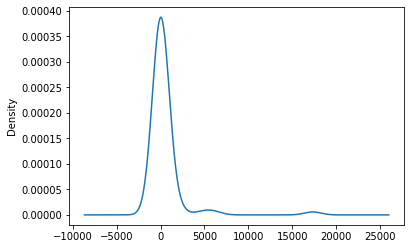

In [12]:
classification_counts.plot.density()

In [13]:
classification_to_replace = list(classification_counts[classification_counts < 1000].index)

for c in classification_to_replace:
  fin_df.CLASSIFICATION = fin_df.CLASSIFICATION.replace(c, "Other")

fin_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
cat_to_encode = fin_df.dtypes[fin_df.dtypes == "object"].index.tolist()

enc = OneHotEncoder(sparse=False)

encoded_df = pd.DataFrame(enc.fit_transform(
    fin_df[cat_to_encode]
))

encoded_df.columns = enc.get_feature_names(cat_to_encode)
encoded_df

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALPHA SIGMA PHI FRATERNITY INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ART THERAPY ASSOCIATION INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,NAME_AMERICAN CHEMICAL SOCIETY,NAME_AMERICAN CHRISTIAN FICTION WRITERS INC,NAME_AMERICAN COLLEGE OF HEALTHCARE EXECUTIVES,NAME_AMERICAN COLLEGE OF NURSE-MIDWIVES,NAME_AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES,NAME_AMERICAN FEDERATION OF LABOR & CONGRESS OF INDUSTRIAL ORGS,NAME_AMERICAN FEDERATION OF LABOR AND CONGRESS OF INDUSTRIAL ORGS,NAME_AMERICAN FEDERATION OF STATE COUNTY & MUNICIPAL EMPLOYEES,NAME_AMERICAN HIBISCUS,NAME_AMERICAN INDEPENDENT BUSINESS ALLIANCE,NAME_AMERICAN INSTITUTE OF GRAPHIC ARTS,NAME_AMERICAN IRIS SOCIETY,NAME_AMERICAN LEGION,NAME_AMERICAN LEGION AUXILIARY,NAME_AMERICAN NEPHROLOGY NURSES ASSOCIATION,NAME_AMERICAN POSTAL WORKERS UNION,NAME_AMERICAN SOCIETY OF ADDICTION MEDICINE INC,NAME_AMERICAN STUDENT DENTAL ASSOCIATION,NAME_AMERICAN VOLKSSPORT ASSOCIATION INC,NAME_AMERICAN WATER WORKS ASSOCIATION,NAME_AMERICAN YOUTH FOOTBALL INC,NAME_AMERICANS UNITED FOR SEPARATION OF CHURCH AND STATE,NAME_AMIGOS DE LAS AMERICAS,...,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

In [15]:
post_df = fin_df.merge(encoded_df, left_index=True, right_index=True)
post_df = post_df.drop(cat_to_encode, axis=1)
post_df 

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALPHA SIGMA PHI FRATERNITY INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ART THERAPY ASSOCIATION INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,NAME_AMERICAN CHEMICAL SOCIETY,NAME_AMERICAN CHRISTIAN FICTION WRITERS INC,NAME_AMERICAN COLLEGE OF HEALTHCARE EXECUTIVES,NAME_AMERICAN COLLEGE OF NURSE-MIDWIVES,NAME_AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES,NAME_AMERICAN FEDERATION OF LABOR & CONGRESS OF INDUSTRIAL ORGS,NAME_AMERICAN FEDERATION OF LABOR AND CONGRESS OF INDUSTRIAL ORGS,NAME_AMERICAN FEDERATION OF STATE COUNTY & MUNICIPAL EMPLOYEES,NAME_AMERICAN HIBISCUS,NAME_AMERICAN INDEPENDENT BUSINESS ALLIANCE,NAME_AMERICAN INSTITUTE OF GRAPHIC ARTS,NAME_AMERICAN IRIS SOCIETY,NAME_AMERICAN LEGION,NAME_AMERICAN LEGION AUXILIARY,NAME_AMERICAN NEPHROLOGY NURSES ASSOCIATION,NAME_AMERICAN POSTAL WORKERS UNION,NAME_AMERICAN SOCIETY OF ADDICTION MEDICINE INC,NAME_AMERICAN STUDENT DENTAL ASSOCIATION,NAME_AMERICAN VOLKSSPORT ASSOCIATION INC,NAME_AMERICAN WATER WORKS ASSOCIATION,...,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [16]:
y = post_df["IS_SUCCESSFUL"].values
X = post_df.drop(["IS_SUCCESSFUL"], axis = 1).values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
num_input = len(X_train_scaled[0])
hidden_1 = 100
hidden_2 = 30
hidden_3 = 10

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(input_dim=num_input, units=hidden_1, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               39900     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 43,891
Trainable params: 43,891
Non-trainable params: 0
_________________________________________________________________


In [20]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.4663 - accuracy: 0.7765
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4309 - accuracy: 0.7936
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4281 - accuracy: 0.7943
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4253 - accuracy: 0.7974
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4240 - accuracy: 0.7961
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4227 - accuracy: 0.7989
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4222 - accuracy: 0.7981
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4216 - accuracy: 0.7987
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4206 - accuracy: 0.7999
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4204 - accura

In [22]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4700 - accuracy: 0.7888
Loss: 0.4699515402317047, Accuracy: 0.7888046503067017
